<a href="https://colab.research.google.com/github/silviabarasa/week5ip/blob/main/Moringa_Data_Science_Prep_W5_GroupProject_2021_05_DrugAnalytica_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DRUG USAGE ANALYSIS
#Objectives
##Main Objective
- Analysing the trends of drug abuse among the various age groups, countries, gender, education levels and ethnicity. 
##Other objectives
- Determining the age group with the highest rate of drug/substance abuse.
- Finding out the age group with the lowest rate of drug/substance abuse. 
- Establishing the most used drug.
- Determining the most used drug among the gender groups, countries, education levels and ethnicity.
#Datasets
- Dataset [link text](https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data)
- Data Description[link text](https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29)

#1. Importing the required libraries

In [ ]:
#Importing the required libraries
import pandas as pd
import numpy as np

#2. Loading our dataset

In [ ]:
#We will load our dataset to our environment
#We will also assign column names to our data
header_list = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol', 'Amphetamines', ' Amyl', ' Benzos', ' caffeine', 'Cannabis', 'chocolate ', ' cocaine', ' Crack', 'Ecstasy', ' Heroin', ' Ketamine', ' legal highs', ' LSD ', 'methadone', 'Mushrooms', 'Nicotine', 'Semer', ' Volatile']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data'
, names=header_list)
df


,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphetamines,Amyl,Benzos,caffeine,Cannabis,chocolate,cocaine,Crack,Ecstasy,Heroin,Ketamine,legal highs,LSD,methadone,Mushrooms,Nicotine,Semer,Volatile
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,CL5,CL0,CL0,CL0,CL6,CL6,CL5,CL0,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


#3. Previewing our dataset

In [ ]:
#Previewing information  about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            1885 non-null   int64  
 1   Age           1885 non-null   float64
 2   Gender        1885 non-null   float64
 3   Education     1885 non-null   float64
 4   Country       1885 non-null   float64
 5   Ethnicity     1885 non-null   float64
 6   Nscore        1885 non-null   float64
 7   Escore        1885 non-null   float64
 8   Oscore        1885 non-null   float64
 9   Ascore        1885 non-null   float64
 10  Cscore        1885 non-null   float64
 11  Impulsive     1885 non-null   float64
 12  SS            1885 non-null   float64
 13  Alcohol       1885 non-null   object 
 14  Amphetamines  1885 non-null   object 
 15   Amyl         1885 non-null   object 
 16   Benzos       1885 non-null   object 
 17   caffeine     1885 non-null   object 
 18  Cannabis      1885 non-null 

In [ ]:
#Previewing the shape of our dataset
df.shape

(1885, 32)

In [ ]:
#Previewing the first five rows
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphetamines,Amyl,Benzos,caffeine,Cannabis,chocolate,cocaine,Crack,Ecstasy,Heroin,Ketamine,legal highs,LSD,methadone,Mushrooms,Nicotine,Semer,Volatile
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


#4. Data Cleaning

####4.1 Validity

In [ ]:
#dropping the personality columns
df.drop(['Nscore',	'Escore',	'Oscore',	'Ascore',	'Cscore',	'Impulsive',	'SS'], axis=1, inplace=True)

###4.2 Accuracy

In [ ]:
#Dropping all rows where the value of Gender is less than -0.48246 or greater than 0.48246
nr = df[(df['Gender'] < -0.48246) & (df['Gender'] > 0.48246) ].index
df.drop(nr , inplace=True)
#Checking if any of the rows dropped
df.shape
#From the result all rows are accurate and within range

(1885, 25)

###4.3 Completeness

In [ ]:
# Checking if there is any missing value in dataframe as a whole
df.isnull()
# Checking if there is any missing value across each column
df.isnull().any()
# Checking how many missing values there are across each column
df.isnull().sum()

ID              0
Age             0
Gender          0
Education       0
Country         0
Ethnicity       0
Alcohol         0
Amphetamines    0
 Amyl           0
 Benzos         0
 caffeine       0
Cannabis        0
chocolate       0
 cocaine        0
 Crack          0
Ecstasy         0
 Heroin         0
 Ketamine       0
 legal highs    0
 LSD            0
methadone       0
Mushrooms       0
Nicotine        0
Semer           0
 Volatile       0
dtype: int64

###4.4 Consistency

In [ ]:
#Checking for duplicates
df.duplicated().sum()

0

###4.5 Uniformity

In [ ]:
#changing column names to upper case and placing underscore to make the column names be more presentable
df.columns = df.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head(5)

,ID,AGE,GENDER,EDUCATION,COUNTRY,ETHNICITY,ALCOHOL,AMPHETAMINES,AMYL,BENZOS,CAFFEINE,CANNABIS,CHOCOLATE,COCAINE,CRACK,ECSTASY,HEROIN,KETAMINE,LEGAL_HIGHS,LSD,METHADONE,MUSHROOMS,NICOTINE,SEMER,VOLATILE
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [ ]:
#Changing values  in gender column to categories i.e male and female
df['GENDER']=df['GENDER'].apply(lambda x: 'male' if x<0 else 'female')
df

,ID,AGE,GENDER,EDUCATION,COUNTRY,ETHNICITY,ALCOHOL,AMPHETAMINES,AMYL,BENZOS,CAFFEINE,CANNABIS,CHOCOLATE,COCAINE,CRACK,ECSTASY,HEROIN,KETAMINE,LEGAL_HIGHS,LSD,METHADONE,MUSHROOMS,NICOTINE,SEMER,VOLATILE
0,1,0.49788,female,-0.05921,0.96082,0.12600,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,male,1.98437,0.96082,-0.31685,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,male,-0.05921,0.96082,-0.31685,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,female,1.16365,0.96082,-0.31685,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,female,1.98437,0.96082,-0.31685,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,female,-0.61113,-0.57009,-0.31685,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,male,-0.61113,-0.57009,-0.31685,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,female,0.45468,-0.57009,-0.31685,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,female,-0.61113,-0.57009,-0.31685,CL5,CL0,CL0,CL0,CL6,CL6,CL5,CL0,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [ ]:
#Classifying the ages to different age groups
df['AGE']=df['AGE'].apply(lambda x: '18-24' if x==-0.95197 else ('25-34' if x==-0.07854 else ('35-44' if x==0.49788 else ('45-54' if x==1.09449 else ('55-64' if x==1.82213 else '65+')))))
df

,ID,AGE,GENDER,EDUCATION,COUNTRY,ETHNICITY,ALCOHOL,AMPHETAMINES,AMYL,BENZOS,CAFFEINE,CANNABIS,CHOCOLATE,COCAINE,CRACK,ECSTASY,HEROIN,KETAMINE,LEGAL_HIGHS,LSD,METHADONE,MUSHROOMS,NICOTINE,SEMER,VOLATILE
0,1,65+,female,-0.05921,0.96082,0.12600,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,male,1.98437,0.96082,-0.31685,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,65+,male,-0.05921,0.96082,-0.31685,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,65+,female,1.16365,0.96082,-0.31685,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,65+,female,1.98437,0.96082,-0.31685,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,65+,female,-0.61113,-0.57009,-0.31685,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,65+,male,-0.61113,-0.57009,-0.31685,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,25-34,female,0.45468,-0.57009,-0.31685,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,65+,female,-0.61113,-0.57009,-0.31685,CL5,CL0,CL0,CL0,CL6,CL6,CL5,CL0,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [ ]:
df['AGE'].unique()

array(['65+', '25-34', '45-54', '55-64'], dtype=object)

In [ ]:
#Classifying the education column with their respective levels of education
df['EDUCATION']=df['EDUCATION'].apply(lambda x: 'left school before 16yrs' if x==-2.43591 else ('left school at 16yrs' if x==-1.73790 else ('left school at 17yrs' if x==-1.43719 else ('left school at 18yrs' if x==-1.22751 else ('some colledge/university, no certificate/degree' if x==-0.61113 else ('proffessional certificate/diploma' if x==-0.05921 else ('university degree' if x==0.45468 else ('masters degree' if x==1.16365 else 'Doctrate degree' ))))))))
df.head(10)

,ID,AGE,GENDER,EDUCATION,COUNTRY,ETHNICITY,ALCOHOL,AMPHETAMINES,AMYL,BENZOS,CAFFEINE,CANNABIS,CHOCOLATE,COCAINE,CRACK,ECSTASY,HEROIN,KETAMINE,LEGAL_HIGHS,LSD,METHADONE,MUSHROOMS,NICOTINE,SEMER,VOLATILE
0,1,65+,female,Doctrate degree,0.96082,0.12600,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,male,Doctrate degree,0.96082,-0.31685,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,65+,male,Doctrate degree,0.96082,-0.31685,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,65+,female,masters degree,0.96082,-0.31685,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,65+,female,Doctrate degree,0.96082,-0.31685,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,6,65+,female,left school at 18yrs,0.24923,-0.31685,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,7,45-54,male,masters degree,-0.57009,-0.31685,CL6,CL0,CL0,CL0,CL6,CL1,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,8,65+,male,left school at 16yrs,0.96082,-0.31685,CL5,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,9,65+,female,Doctrate degree,0.24923,-0.31685,CL4,CL0,CL0,CL0,CL6,CL0,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,10,55-64,male,masters degree,0.96082,-0.31685,CL6,CL1,CL0,CL1,CL6,CL1,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [ ]:
#Classifying country column with their respective countries
df['COUNTRY']=df['COUNTRY'].apply(lambda x: 'Australia' if x==-0.09765 else ('Canada' if x==0.24923 else ('New Zealand' if x==-0.46841 else ('other' if x==-0.28519 else ('republic of Ireland' if x==0.21128  else ('UK' if  x==0.96082 else 'USA' ))))))
df.head(10)

,ID,AGE,GENDER,EDUCATION,COUNTRY,ETHNICITY,ALCOHOL,AMPHETAMINES,AMYL,BENZOS,CAFFEINE,CANNABIS,CHOCOLATE,COCAINE,CRACK,ECSTASY,HEROIN,KETAMINE,LEGAL_HIGHS,LSD,METHADONE,MUSHROOMS,NICOTINE,SEMER,VOLATILE
0,1,65+,female,Doctrate degree,USA,0.12600,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,male,Doctrate degree,USA,-0.31685,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,65+,male,Doctrate degree,USA,-0.31685,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,65+,female,masters degree,USA,-0.31685,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,65+,female,Doctrate degree,USA,-0.31685,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,6,65+,female,left school at 18yrs,Canada,-0.31685,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,7,45-54,male,masters degree,USA,-0.31685,CL6,CL0,CL0,CL0,CL6,CL1,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,8,65+,male,left school at 16yrs,USA,-0.31685,CL5,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,9,65+,female,Doctrate degree,Canada,-0.31685,CL4,CL0,CL0,CL0,CL6,CL0,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,10,55-64,male,masters degree,USA,-0.31685,CL6,CL1,CL0,CL1,CL6,CL1,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [ ]:
#Classifying ethnicity column irrespective of their ethnic group
df['ETHNICITY']=df['ETHNICITY'].apply(lambda x: 'Asian' if x==-0.50212 else ('Black' if x==-1.10702 else ('Mixed-Black/Asian' if x==1.90725 else ('Mixed-White/Asian' if x==0.12600 else ('Mixed-White/Black' if x==-0.22166 else ('Other' if x==0.11440 else 'White'))))))
df.head(10)

,ID,AGE,GENDER,EDUCATION,COUNTRY,ETHNICITY,ALCOHOL,AMPHETAMINES,AMYL,BENZOS,CAFFEINE,CANNABIS,CHOCOLATE,COCAINE,CRACK,ECSTASY,HEROIN,KETAMINE,LEGAL_HIGHS,LSD,METHADONE,MUSHROOMS,NICOTINE,SEMER,VOLATILE
0,1,65+,female,Doctrate degree,USA,Mixed-White/Asian,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,male,Doctrate degree,USA,White,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,65+,male,Doctrate degree,USA,White,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,65+,female,masters degree,USA,White,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,65+,female,Doctrate degree,USA,White,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,6,65+,female,left school at 18yrs,Canada,White,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,7,45-54,male,masters degree,USA,White,CL6,CL0,CL0,CL0,CL6,CL1,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,8,65+,male,left school at 16yrs,USA,White,CL5,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,9,65+,female,Doctrate degree,Canada,White,CL4,CL0,CL0,CL0,CL6,CL0,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,10,55-64,male,masters degree,USA,White,CL6,CL1,CL0,CL1,CL6,CL1,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [ ]:
#Classifying the rows  for the column names for the drugs to user and non-user
ls = list(df.columns)
for x in ls[6:24]:
  df[x].replace({"CL0": "non-user", "CL1": "non-user", "CL2": "user","CL3": "user", "CL4": "user", "CL5": "user","CL6": "user" }, inplace=True)

In [ ]:
df.head()

,ID,AGE,GENDER,EDUCATION,COUNTRY,ETHNICITY,ALCOHOL,AMPHETAMINES,AMYL,BENZOS,CAFFEINE,CANNABIS,CHOCOLATE,COCAINE,CRACK,ECSTASY,HEROIN,KETAMINE,LEGAL_HIGHS,LSD,METHADONE,MUSHROOMS,NICOTINE,SEMER,VOLATILE
0,1,65+,female,Doctrate degree,USA,Mixed-White/Asian,user,user,non-user,user,user,non-user,user,non-user,non-user,non-user,non-user,non-user,non-user,non-user,non-user,non-user,user,non-user,CL0
1,2,25-34,male,Doctrate degree,USA,White,user,user,user,non-user,user,user,user,user,non-user,user,non-user,user,non-user,user,user,non-user,user,non-user,CL0
2,3,65+,male,Doctrate degree,USA,White,user,non-user,non-user,non-user,user,user,user,non-user,non-user,non-user,non-user,non-user,non-user,non-user,non-user,non-user,non-user,non-user,CL0
3,4,65+,female,masters degree,USA,White,user,non-user,non-user,user,user,user,user,user,non-user,non-user,non-user,user,non-user,non-user,non-user,non-user,user,non-user,CL0
4,5,65+,female,Doctrate degree,USA,White,user,non-user,non-user,non-user,user,user,user,non-user,non-user,non-user,non-user,non-user,non-user,non-user,non-user,user,user,non-user,CL0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


#Data Analysis

#5 Most used drug

In [ ]:
#most used drug
ls=list(df.columns)
melted_data = pd.melt(df, value_vars=ls[6:24], var_name='drug', value_name='usage')
melted_data = melted_data[melted_data['usage'] == 'user']
melted_data.groupby(by=['drug'])['usage'].count().sort_values(ascending=False)

drug
CHOCOLATE       1850
CAFFEINE        1848
ALCOHOL         1817
CANNABIS        1265
NICOTINE        1264
BENZOS           769
LEGAL_HIGHS      762
ECSTASY          751
MUSHROOMS        694
COCAINE          687
AMPHETAMINES     679
LSD              557
METHADONE        417
AMYL             370
KETAMINE         350
HEROIN           212
CRACK            191
SEMER              6
Name: usage, dtype: int64

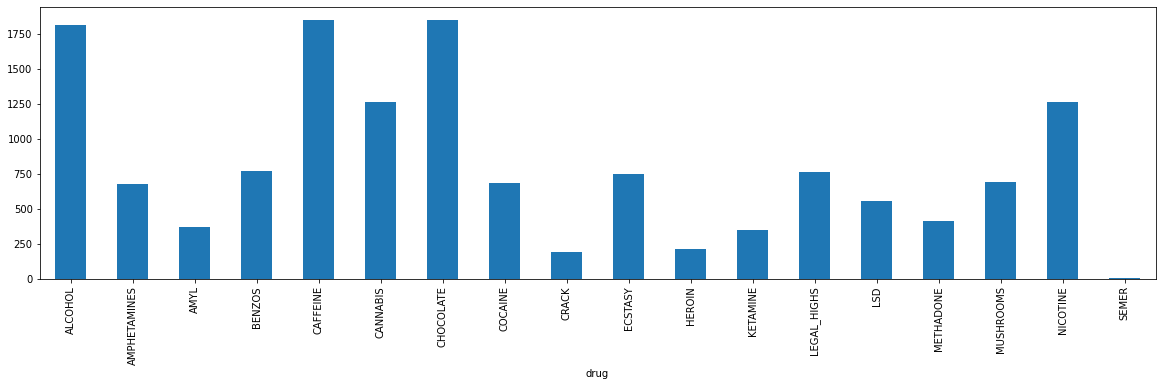

In [ ]:
#Plotting the most used drug
ls=list(df.columns)
melted_data = pd.melt(df, value_vars=ls[6:24], var_name='drug', value_name='usage')
melted_data = melted_data[melted_data['usage'] == 'user']
melted_data.groupby(by=['drug'])['usage'].count().plot(kind='bar', figsize=(20,5))

#6 Comparing drug usage across the gender,age,ethnicity,country and education.

In [ ]:
#Comparing drug usage across the genders
ls=list(df.columns)
melted_data = pd.melt(df,id_vars='GENDER', value_vars=ls[6:24], var_name='drug', value_name='usage')
melted_data = melted_data[melted_data['usage'] == 'user']
melted_data.groupby(by=['drug','GENDER'])['usage'].count().sort_values(ascending=False)

drug          GENDER
CAFFEINE      male      928
CHOCOLATE     male      925
              female    925
CAFFEINE      female    920
ALCOHOL       female    910
              male      907
CANNABIS      male      738
NICOTINE      male      703
              female    561
CANNABIS      female    527
LEGAL_HIGHS   male      525
ECSTASY       male      483
MUSHROOMS     male      463
BENZOS        male      446
AMPHETAMINES  male      445
COCAINE       male      417
LSD           male      392
BENZOS        female    323
METHADONE     male      282
COCAINE       female    270
ECSTASY       female    268
KETAMINE      male      244
LEGAL_HIGHS   female    237
AMYL          male      236
AMPHETAMINES  female    234
MUSHROOMS     female    231
LSD           female    165
HEROIN        male      146
CRACK         male      135
METHADONE     female    135
AMYL          female    134
KETAMINE      female    106
HEROIN        female     66
CRACK         female     56
SEMER         female      4

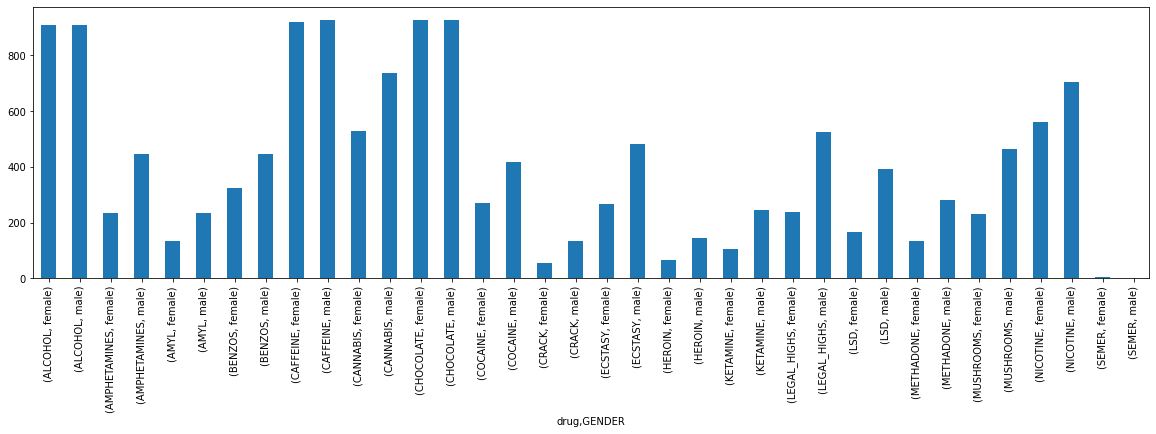

In [ ]:
#Comparing drug usage across the genders
ls=list(df.columns)
melted_data = pd.melt(df,id_vars='GENDER', value_vars=ls[6:24], var_name='drug', value_name='usage')
melted_data = melted_data[melted_data['usage'] == 'user']
melted_data.groupby(by=['drug','GENDER'])['usage'].count().plot(kind='bar', figsize=(20,5))

In [ ]:
#Usage of drugs across different ages
ls=list(df.columns)
melted_data = pd.melt(df,id_vars='AGE', value_vars=ls[6:24], var_name='drug', value_name='usage')
melted_data = melted_data[melted_data['usage'] == 'user']
melted_data.groupby(by=['drug','AGE'])['usage'].count().sort_values(ascending=False)

drug       AGE  
CAFFEINE   65+      1006
CHOCOLATE  65+       999
ALCOHOL    65+       985
CANNABIS   65+       776
NICOTINE   65+       755
                    ... 
SEMER      65+         5
LSD        55-64       3
HEROIN     55-64       2
SEMER      25-34       1
KETAMINE   55-64       1
Name: usage, Length: 70, dtype: int64

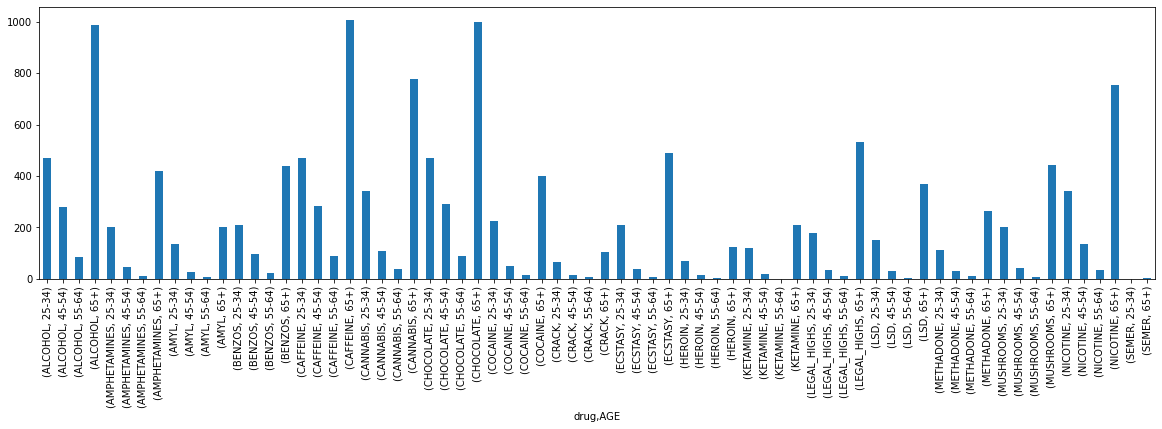

In [ ]:
ls=list(df.columns)
melted_data = pd.melt(df,id_vars='AGE', value_vars=ls[6:24], var_name='drug', value_name='usage')
melted_data = melted_data[melted_data['usage'] == 'user']
melted_data.groupby(by=['drug','AGE'])['usage'].count().plot(kind='bar', figsize=(20,5))

In [ ]:
#Users in the different education levels
ls=list(df.columns)
melted_data = pd.melt(df,id_vars='EDUCATION', value_vars=ls[6:24], var_name='drug', value_name='usage')
melted_data = melted_data[melted_data['usage'] == 'user']
melted_data.groupby(by=['drug','EDUCATION'])['usage'].count().sort_values(ascending=False)

drug       EDUCATION               
CHOCOLATE  Doctrate degree             1323
CAFFEINE   Doctrate degree             1322
ALCOHOL    Doctrate degree             1299
CANNABIS   Doctrate degree              948
NICOTINE   Doctrate degree              918
                                       ... 
SEMER      Doctrate degree                5
KETAMINE   left school before 16yrs       3
AMYL       left school at 17yrs           3
KETAMINE   left school at 17yrs           2
SEMER      left school at 16yrs           1
Name: usage, Length: 104, dtype: int64

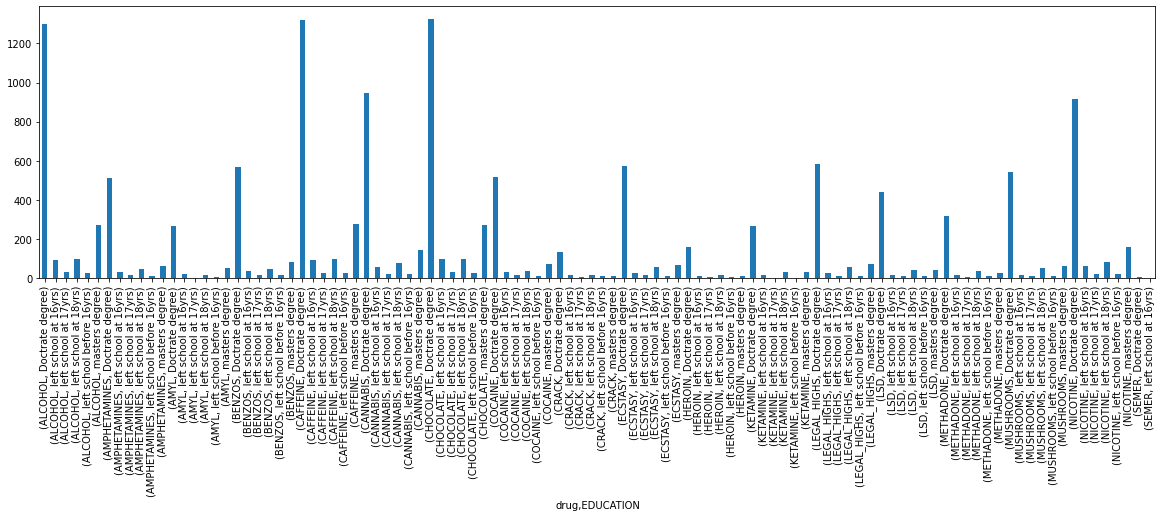

In [ ]:
#Users in the different education levels
ls=list(df.columns)
melted_data = pd.melt(df,id_vars='EDUCATION', value_vars=ls[6:24], var_name='drug', value_name='usage')
melted_data = melted_data[melted_data['usage'] == 'user']
melted_data.groupby(by=['drug','EDUCATION'])['usage'].count().plot(kind='bar', figsize=(20,5))

In [ ]:
#usage of drug in the countries
ls=list(df.columns)
melted_data = pd.melt(df,id_vars='COUNTRY', value_vars=ls[6:24], var_name='drug', value_name='usage')
melted_data = melted_data[melted_data['usage'] == 'user']
melted_data.groupby(by=['drug','COUNTRY'])['usage'].count().sort_values(ascending=False)

drug       COUNTRY  
CHOCOLATE  USA          1597
CAFFEINE   USA          1590
ALCOHOL    USA          1569
NICOTINE   USA          1067
CANNABIS   USA          1049
                        ... 
CRACK      other          10
HEROIN     Australia       6
CRACK      Australia       5
SEMER      USA             4
           Australia       2
Name: usage, Length: 70, dtype: int64

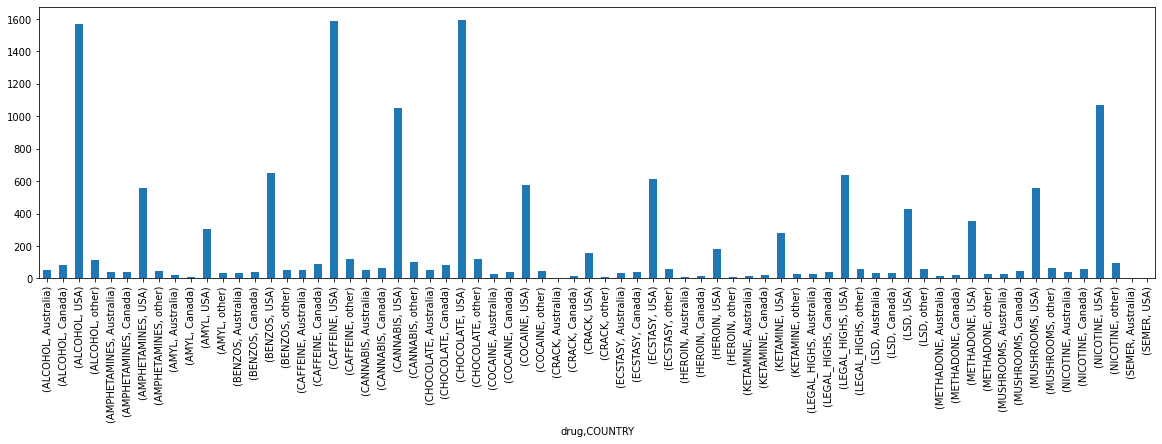

In [ ]:
#usage of drug in the countries
ls=list(df.columns)
melted_data = pd.melt(df,id_vars='COUNTRY', value_vars=ls[6:24], var_name='drug', value_name='usage')
melted_data = melted_data[melted_data['usage'] == 'user']
melted_data.groupby(by=['drug','COUNTRY'])['usage'].count().plot(kind='bar', figsize=(20,5))

In [ ]:
#Comparing drug usage across different ethnicity
ls=list(df.columns)
melted_data = pd.melt(df,id_vars='ETHNICITY', value_vars=ls[6:24], var_name='drug', value_name='usage')
melted_data = melted_data[melted_data['usage'] == 'user']
melted_data.groupby(by=['drug','ETHNICITY'])['usage'].count().sort_values(ascending=False)

drug         ETHNICITY        
CHOCOLATE    White                1722
CAFFEINE     White                1721
ALCOHOL      White                1695
CANNABIS     White                1175
NICOTINE     White                1175
                                  ... 
HEROIN       Asian                   1
COCAINE      Mixed-Black/Asian       1
LEGAL_HIGHS  Mixed-Black/Asian       1
SEMER        Asian                   1
             Other                   1
Name: usage, Length: 97, dtype: int64

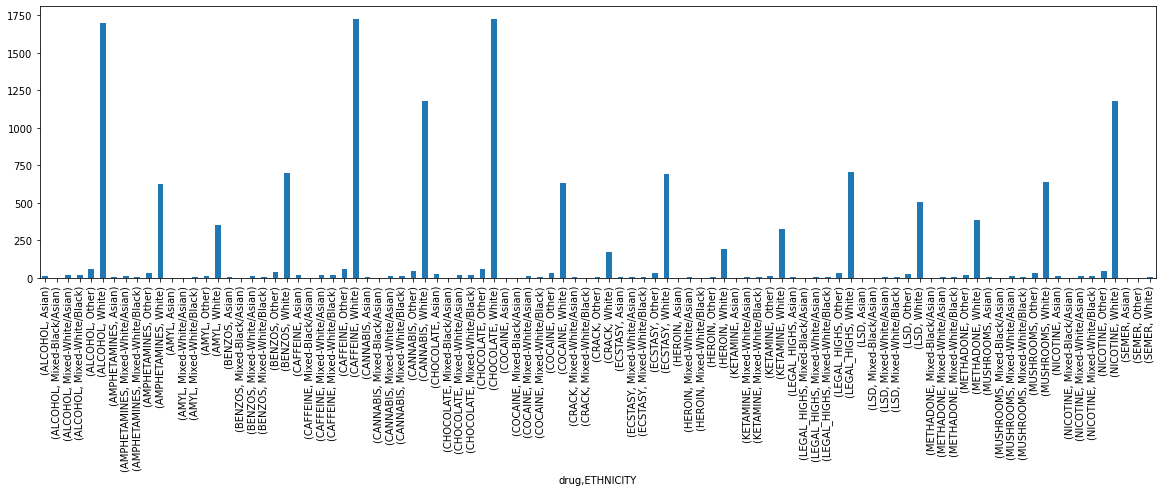

In [ ]:
#Comparing drug usage across different ethnicity
ls=list(df.columns)
melted_data = pd.melt(df,id_vars='ETHNICITY', value_vars=ls[6:24], var_name='drug', value_name='usage')
melted_data = melted_data[melted_data['usage'] == 'user']
melted_data.groupby(by=['drug','ETHNICITY'])['usage'].count().plot(kind='bar', figsize=(20,5))

#7 The age group with the highest and lowest usage of drug

In [ ]:
#The age group with the highest and lowest usage of drug
ls=list(df.columns)
melted_data = pd.melt(df,id_vars='AGE', value_vars=ls[6:24], var_name='drug', value_name='usage')
melted_data = melted_data[melted_data['usage'] == 'user']
melted_data.groupby(by=['AGE'])['usage'].count().sort_values(ascending=False)

AGE
65+      8529
25-34    3970
45-54    1547
55-64     443
Name: usage, dtype: int64

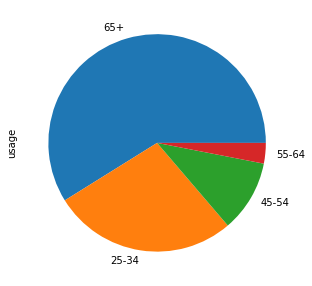

In [ ]:
#Plotting the age group with the highest and lowest usage of drug
ls=list(df.columns)
melted_data = pd.melt(df,id_vars='AGE', value_vars=ls[6:24], var_name='drug', value_name='usage')
melted_data = melted_data[melted_data['usage'] == 'user']
melted_data.groupby(by=['AGE'])['usage'].count().sort_values(ascending=False).plot(kind='pie', figsize=(20,5))

In [ ]:
#The Usage of drugs in the 65+ age group
ls=list(df.columns)
melted_data = pd.melt(df,id_vars='AGE', value_vars=ls[6:24], var_name='drug', value_name='usage')
melted_data = melted_data[melted_data['usage'] == 'user']
melted_data = melted_data[melted_data['AGE'] == '65+']
melted_data.groupby(by=['drug'])['usage'].count().sort_values(ascending=False)

drug
CAFFEINE        1006
CHOCOLATE        999
ALCOHOL          985
CANNABIS         776
NICOTINE         755
LEGAL_HIGHS      534
ECSTASY          491
MUSHROOMS        443
BENZOS           438
AMPHETAMINES     421
COCAINE          400
LSD              369
METHADONE        263
KETAMINE         211
AMYL             203
HEROIN           126
CRACK            104
SEMER              5
Name: usage, dtype: int64

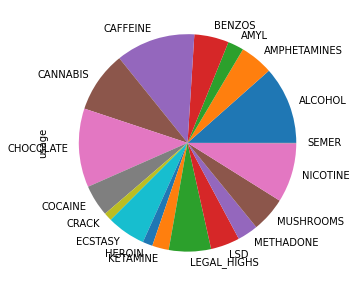

In [ ]:
#plotting drug usage in the 65+ age group
ls=list(df.columns)
melted_data = pd.melt(df,id_vars='AGE', value_vars=ls[6:24], var_name='drug', value_name='usage')
melted_data = melted_data[melted_data['usage'] == 'user']
melted_data = melted_data[melted_data['AGE'] == '65+']
melted_data.groupby(by=['drug'])['usage'].count().plot(kind='pie', figsize=(20,5))

#8. Most used drug in various categories


In [ ]:
#Overall usage of drugs in the vaious education categories from highest to lowest
ls=list(df.columns)
melted_data = pd.melt(df,id_vars='EDUCATION', value_vars=ls[6:24], var_name='drug', value_name='usage')
melted_data = melted_data[melted_data['usage'] == 'user']
melted_data.groupby(by=['EDUCATION'])['usage'].count().sort_values(ascending=False)

EDUCATION
Doctrate degree             10693
masters degree               1712
left school at 18yrs          914
left school at 16yrs          673
left school at 17yrs          257
left school before 16yrs      240
Name: usage, dtype: int64

In [ ]:
#usage of drugs in the Doctorate degree 
ls=list(df.columns)
melted_data = pd.melt(df,id_vars='EDUCATION', value_vars=ls[6:24], var_name='drug', value_name='usage')
melted_data = melted_data[melted_data['usage'] == 'user']
melted_data = melted_data[melted_data['EDUCATION'] == 'Doctrate degree']
melted_data.groupby(by=['drug','EDUCATION'])['usage'].count().sort_values(ascending=False)

drug          EDUCATION      
CHOCOLATE     Doctrate degree    1323
CAFFEINE      Doctrate degree    1322
ALCOHOL       Doctrate degree    1299
CANNABIS      Doctrate degree     948
NICOTINE      Doctrate degree     918
LEGAL_HIGHS   Doctrate degree     585
ECSTASY       Doctrate degree     572
BENZOS        Doctrate degree     567
MUSHROOMS     Doctrate degree     541
COCAINE       Doctrate degree     515
AMPHETAMINES  Doctrate degree     510
LSD           Doctrate degree     439
METHADONE     Doctrate degree     318
AMYL          Doctrate degree     269
KETAMINE      Doctrate degree     265
HEROIN        Doctrate degree     161
CRACK         Doctrate degree     136
SEMER         Doctrate degree       5
Name: usage, dtype: int64

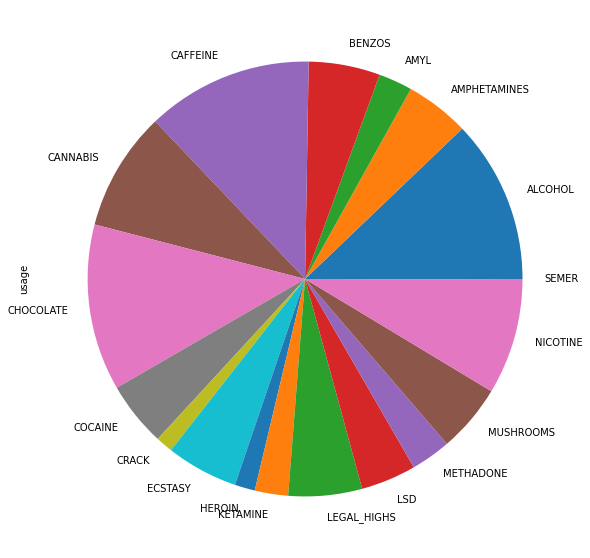

In [ ]:
#Plotting usage of drugs in the doctrate degree
ls=list(df.columns)
melted_data = pd.melt(df,id_vars='EDUCATION', value_vars=ls[6:24], var_name='drug', value_name='usage')
melted_data = melted_data[melted_data['usage'] == 'user']
melted_data = melted_data[melted_data['EDUCATION'] == 'Doctrate degree']
melted_data.groupby(by=['drug'])['usage'].count().plot(kind='pie', figsize=(20,10))

In [ ]:
#The country with the highest and lowest usage of drug
ls=list(df.columns)
melted_data = pd.melt(df,id_vars='COUNTRY', value_vars=ls[6:24], var_name='drug', value_name='usage')
melted_data = melted_data[melted_data['usage'] == 'user']
melted_data.groupby(by=['COUNTRY'])['usage'].count().sort_values(ascending=False)

COUNTRY
USA          12181
other         1038
Canada         736
Australia      534
Name: usage, dtype: int64

In [ ]:
#drug usage in USA
ls=list(df.columns)
melted_data = pd.melt(df,id_vars='COUNTRY', value_vars=ls[6:24], var_name='drug', value_name='usage')
melted_data = melted_data[melted_data['usage'] == 'user']
melted_data = melted_data[melted_data['COUNTRY'] == 'USA']
melted_data.groupby(by=['drug'])['usage'].count().sort_values(ascending=False)

drug
CHOCOLATE       1597
CAFFEINE        1590
ALCOHOL         1569
NICOTINE        1067
CANNABIS        1049
BENZOS           648
LEGAL_HIGHS      637
ECSTASY          615
COCAINE          575
AMPHETAMINES     556
MUSHROOMS        556
LSD              431
METHADONE        356
AMYL             308
KETAMINE         281
HEROIN           183
CRACK            159
SEMER              4
Name: usage, dtype: int64

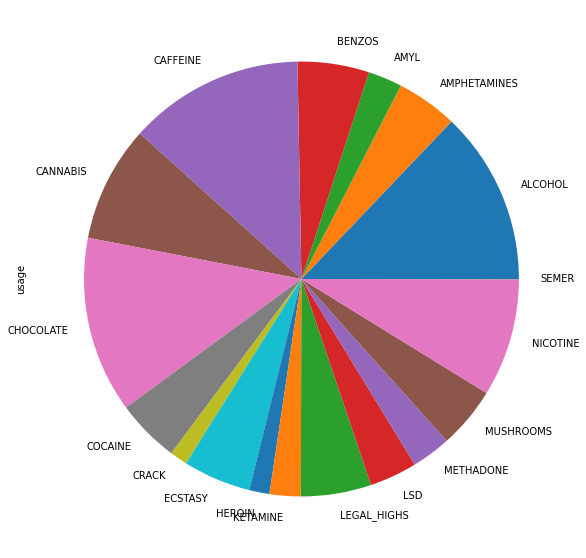

In [ ]:
#Graph for usage of drugs in USA
ls=list(df.columns)
melted_data = pd.melt(df,id_vars='COUNTRY', value_vars=ls[6:24], var_name='drug', value_name='usage')
melted_data = melted_data[melted_data['usage'] == 'user']
melted_data = melted_data[melted_data['COUNTRY'] == 'USA']
melted_data.groupby(by=['drug'])['usage'].count().plot(kind='pie', figsize=(20,10))

In [ ]:
#Ethnicity with highest and lowest usage of drugs
ls=list(df.columns)
melted_data = pd.melt(df,id_vars='ETHNICITY', value_vars=ls[6:24], var_name='drug', value_name='usage')
melted_data = melted_data[melted_data['usage'] == 'user']
melted_data.groupby(by=['ETHNICITY'])['usage'].count().sort_values(ascending=False)

ETHNICITY
White                13419
Other                  574
Mixed-White/Asian      189
Mixed-White/Black      164
Asian                  120
Mixed-Black/Asian       23
Name: usage, dtype: int64

In [ ]:
#Usage of drugs by the whites
ls=list(df.columns)
melted_data = pd.melt(df,id_vars='ETHNICITY', value_vars=ls[6:24], var_name='drug', value_name='usage')
melted_data = melted_data[melted_data['usage'] == 'user']
melted_data = melted_data[melted_data['ETHNICITY'] == 'White']
melted_data.groupby(by=['drug'])['usage'].count().sort_values(ascending=False)

drug
CHOCOLATE       1722
CAFFEINE        1721
ALCOHOL         1695
NICOTINE        1175
CANNABIS        1175
LEGAL_HIGHS      705
BENZOS           698
ECSTASY          693
MUSHROOMS        638
COCAINE          635
AMPHETAMINES     624
LSD              506
METHADONE        387
AMYL             350
KETAMINE         325
HEROIN           193
CRACK            173
SEMER              4
Name: usage, dtype: int64

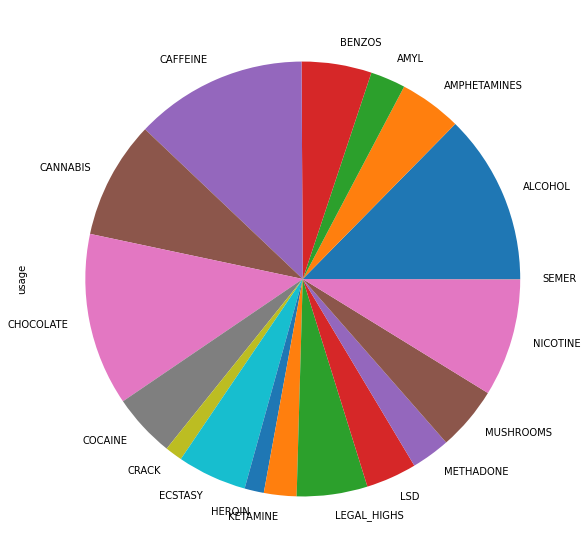

In [ ]:
#Plotting usage of drugs by the whites
ls=list(df.columns)
melted_data = pd.melt(df,id_vars='ETHNICITY', value_vars=ls[6:24], var_name='drug', value_name='usage')
melted_data = melted_data[melted_data['usage'] == 'user']
melted_data = melted_data[melted_data['ETHNICITY'] == 'White']
melted_data.groupby(by=['drug'])['usage'].count().plot(kind='pie', figsize=(20,10))

In [ ]:
#Gender with the most number of drug usage
ls=list(df.columns)
melted_data = pd.melt(df,id_vars='GENDER', value_vars=ls[6:24], var_name='drug', value_name='usage')
melted_data = melted_data[melted_data['usage'] == 'user']
melted_data.groupby(by=['GENDER'])['usage'].count().sort_values(ascending=False)

GENDER
male      8417
female    6072
Name: usage, dtype: int64

In [ ]:
#drug usage among the males
ls=list(df.columns)
melted_data = pd.melt(df,id_vars='GENDER', value_vars=ls[6:24], var_name='drug', value_name='usage')
melted_data = melted_data[melted_data['usage'] == 'user']
melted_data = melted_data[melted_data['GENDER'] == 'male']
melted_data.groupby(by=['drug'])['usage'].count().sort_values(ascending=False)

drug
CAFFEINE        928
CHOCOLATE       925
ALCOHOL         907
CANNABIS        738
NICOTINE        703
LEGAL_HIGHS     525
ECSTASY         483
MUSHROOMS       463
BENZOS          446
AMPHETAMINES    445
COCAINE         417
LSD             392
METHADONE       282
KETAMINE        244
AMYL            236
HEROIN          146
CRACK           135
SEMER             2
Name: usage, dtype: int64

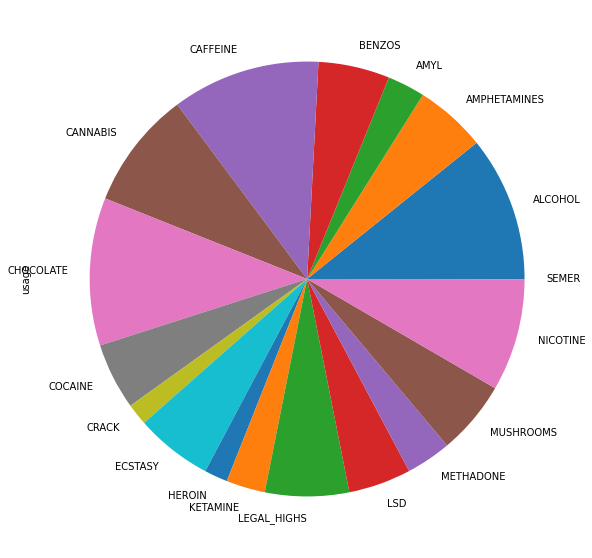

In [ ]:
#Plotting drug usage among the males
ls=list(df.columns)
melted_data = pd.melt(df,id_vars='GENDER', value_vars=ls[6:24], var_name='drug', value_name='usage')
melted_data = melted_data[melted_data['usage'] == 'user']
melted_data = melted_data[melted_data['GENDER'] == 'male']
melted_data.groupby(by=['drug'])['usage'].count().plot(kind='pie', figsize=(20,10))

#8. Recommendations
- Being the most used drugs : chocolate, caffeine and alcohol, we’d recommend for people to be cautious while consuming  products that contain these components to prevent addiction.
- The government should formulate strategies to sensitize people on chocolate and caffeine consumption because most users might be abusing them unconsciously.

- It is our observation that specific categories i.e males, doctorate students, people aged 65+ years, that are predisposed to high pressure levels abuse drugs/substance the most thus the states should convene  public–private partnerships to implement drug abuse sensitization campaigns with more focus directed on these categories to discourage drug use.

- Extensive research should be carried out to evaluate the factors that lead to most people aged 65 years and above to consume drugs and solutions found to mitigate the problem.

- Drug testing can be a constructive means of helping drug abusers overcome denial of their substance abuse. As a part of intervention, drug testing can be used to help the users achieve and maintain recovery
